In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
folder_path = "/content/drive/MyDrive/NSCLC Dataset/DATA"

In [ ]:
!pip install pydicom
!pip install matplotlib

# Import pydicom library
import pydicom as dicom
import matplotlib.pyplot as plt
import gdown
import os

for filename in os.listdir(folder_path):
  if filename.endswith(".dcm"):
    dcm_path = os.path.join(folder_path, filename)
    ds = dicom.dcmread(dcm_path)
    # Your processing logic here using ds (e.g., extract pixel data, access tags)
    print(f"Processing DICOM file: {filename}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 9.2 MB/s eta 0:00:00
Processing DICOM file: 1-046 (another copy).dcm
Processing DICOM file: 1-030 (3rd copy).dcm
Processing DICOM file: 1-031 (3rd copy).dcm
Processing DICOM file: 1-047 (another copy).dcm
Processing DICOM file: 1-032 (3rd copy).dcm
Processing DICOM file: 1-033 (3rd copy).dcm
Processing DICOM file: 1-048 (another copy).dcm
Processing DICOM file: 1-034 (3rd copy).dcm
Processing DICOM file: 1-049 (another copy).dcm
Processing DICOM file: 1-035 (3rd copy).dcm
Processing DICOM file: 1-050 (another copy).dcm
Processing DICOM file: 1-036 (3rd copy).dcm
Processing DICOM file: 1-051 (another copy).dcm
Processing DICOM file: 1-037 (3rd copy).dcm
Processing DICOM file: 1-052 (another copy).dcm
Processing DICOM file: 1-038 (3rd copy).dcm
Processing DICOM file: 1-053 (another copy).dcm
Processing DICOM file: 1-054 (another copy).dcm
Processing DICOM file: 1-039 (3rd copy).dcm
Processing DICOM file: 1-055 (another copy).dcm
Pr

**PRE-PROCESSING**

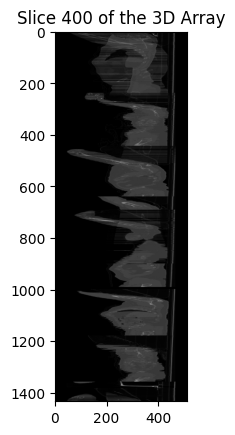

In [ ]:
import pydicom
import numpy as np
series_dir = "/content/drive/MyDrive/NSCLC Dataset/DATA"

# Load all files in the directory
dicom_series = [pydicom.read_file(os.path.join(series_dir, filename)) for filename in os.listdir(series_dir)]

# Extract and stack pixel arrays into a 3D array
hu_array = np.stack([dicom_file.pixel_array for dicom_file in dicom_series])
# Choose slice index (e.g., 100 for the middle slice)
slice_index = 400

# Extract and display the chosen slice
slice_image = hu_array[:, :, slice_index]
plt.imshow(slice_image, cmap="gray")
plt.title(f"Slice {slice_index} of the 3D Array")
plt.show()

In [ ]:
import os
import pydicom as dicom

# Define the base directory of your DICOM dataset
dataset_dir = "/content/drive/MyDrive/NSCLC Dataset/DATA"

# Empty list to store pixel arrays
pixel_arrays = []

# Loop through all subdirectories and files within the dataset directory
for root, subdirs, files in os.walk(dataset_dir):
  for filename in files:
    if filename.endswith(".dcm"):
      # Construct the full path to the DICOM file
      dcm_path = os.path.join(root, filename)

      # Read the DICOM file and extract the pixel array
      try:
        dicom_file = dicom.read_file(dcm_path)
        pixel_array = dicom_file.pixel_array
        pixel_arrays.append(pixel_array)
        print(f"Extracted pixel array from: {dcm_path}")
      except Exception as e:
        print(f"Error extracting pixel array from: {dcm_path} - {e}")

# You can now access and process the list of pixel arrays
print(f"Total extracted pixel arrays: {len(pixel_arrays)}")

Extracted pixel array from: /content/drive/MyDrive/NSCLC Dataset/DATA/1-046 (another copy).dcm
Extracted pixel array from: /content/drive/MyDrive/NSCLC Dataset/DATA/1-030 (3rd copy).dcm
Extracted pixel array from: /content/drive/MyDrive/NSCLC Dataset/DATA/1-031 (3rd copy).dcm
Extracted pixel array from: /content/drive/MyDrive/NSCLC Dataset/DATA/1-047 (another copy).dcm
Extracted pixel array from: /content/drive/MyDrive/NSCLC Dataset/DATA/1-032 (3rd copy).dcm
Extracted pixel array from: /content/drive/MyDrive/NSCLC Dataset/DATA/1-033 (3rd copy).dcm
Extracted pixel array from: /content/drive/MyDrive/NSCLC Dataset/DATA/1-048 (another copy).dcm
Extracted pixel array from: /content/drive/MyDrive/NSCLC Dataset/DATA/1-034 (3rd copy).dcm
Extracted pixel array from: /content/drive/MyDrive/NSCLC Dataset/DATA/1-049 (another copy).dcm
Extracted pixel array from: /content/drive/MyDrive/NSCLC Dataset/DATA/1-035 (3rd copy).dcm
Extracted pixel array from: /content/drive/MyDrive/NSCLC Dataset/DATA/1-05

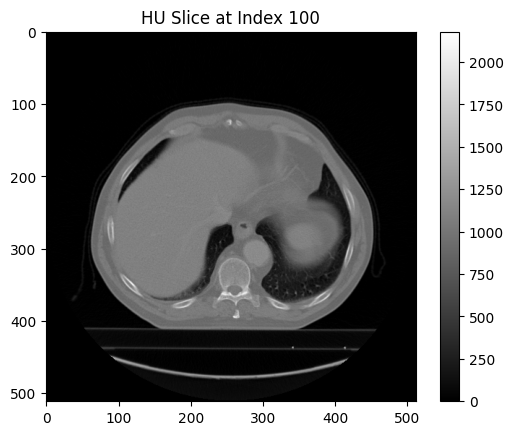

In [ ]:
hu_array = np.zeros((dicom_series[0].Rows, dicom_series[0].Columns, len(dicom_series)))

# Loop through each DICOM file and extract intensity slice
for i, dicom_file in enumerate(dicom_series):
    hu_array[:, :, i] = dicom_file.pixel_array
    min_hu = -1000
max_hu = 2000
hu_array_scaled = (hu_array - min_hu) / (max_hu - min_hu)
slice_index = 100
slice_image = hu_array[:, :, slice_index]

# Plot the slice with appropriate scaling
plt.imshow(slice_image, cmap="gray")
plt.colorbar()
plt.title(f"HU Slice at Index {slice_index}")
plt.show()

In [ ]:
import pydicom
import numpy as np

def read_dicom_series(path):
  dicom_series = []
  for filename in os.listdir(path):
    filepath = os.path.join(path, filename)
    dicom_series.append(pydicom.dcmread(filepath))
  return dicom_series

def get_voxel_data(dataset, rescale=True):


  pixel_array = dataset.pixel_array
  if rescale:
    slope = dataset.RescaleSlope
    intercept = dataset.RescaleIntercept
    pixel_array = slope * pixel_array + intercept
  return pixel_array

def build_3d_array(dicom_series):

  z_dim = len(dicom_series)
  x_dim, y_dim = dicom_series[0].pixel_array.shape
  voxel_array = np.zeros((z_dim, x_dim, y_dim))
  for i, dataset in enumerate(dicom_series):
    voxel_array[i] = get_voxel_data(dataset)
  return voxel_array

# Replace "path/to/dicom_series" with your actual DICOM series directory
dicom_series = read_dicom_series("/content/drive/MyDrive/NSCLC Dataset/DATA")
voxel_data = build_3d_array(dicom_series)

# Access specific voxel values by indexing the array (z, x, y)
hu_value = voxel_data[100, 50, 20]

print(f"Voxel intensity at (100, 50, 20): {hu_value} HU")


Voxel intensity at (100, 50, 20): -1000.0 HU


In [ ]:
import os
import pydicom
import numpy as np
from skimage.exposure import equalize_hist, rescale_intensity

# Visualization imports (optional)
import matplotlib.pyplot as plt

# Define your DICOM images directory
images_dir = "/content/drive/MyDrive/NSCLC Dataset/DATA"
contrast_dir = "/content/contrast"

# Empty lists for storing original and enhanced data
original_images = []
enhanced_images = []

# Loop through all DICOM files in the directory
for filename in os.listdir(images_dir):
    if filename.endswith(".dcm"):
        # Read DICOM file and extract pixel array
        dcm_file = pydicom.read_file(os.path.join(images_dir, filename))
        pixel_array = dcm_file.pixel_array

        # Apply histogram equalization and store both images
        enhanced_array = equalize_hist(pixel_array)
        original_images.append(pixel_array)
        enhanced_images.append(enhanced_array)

        # Optionally visualize each image pair
        fig, axes = plt.subplots(1, 2, figsize=(10, 5))
        axes[0].imshow(pixel_array, cmap="gray")
        axes[0].set_title(f"Original - {filename}")
        axes[1].imshow(enhanced_array, cmap="gray")
        axes[1].set_title(f"Enhanced - {filename}")
        plt.tight_layout()
        plt.show()



# Further processing and analysis of the enhanced image list...

print(f"Processed {len(original_images)} DICOM images.")


In [ ]:
import os
import pydicom
import numpy as np
from skimage.transform import resize

# Upsampling parameters
upsampling_factor = 2

# Define your DICOM images directory and output directory
images_dir = "/content/drive/MyDrive/NSCLC Dataset/DATA"
upsampled_dir = "/content/Data/Resolution"

# Create output directory if it doesn't exist
os.makedirs(upsampled_dir, exist_ok=True)

# Loop through all DICOM files in the directory
for filename in os.listdir(images_dir):
    if filename.endswith(".dcm"):
        # Read DICOM file and extract pixel array
        dcm_file = pydicom.read_file(os.path.join(images_dir, filename))
        pixel_array = dcm_file.pixel_array

        # Calculate new image dimensions based on upsampling factor
        original_rows, original_columns = pixel_array.shape
        new_rows = original_rows * upsampling_factor
        new_columns = original_columns * upsampling_factor

        # Upsample the pixel array using resize (adjust order if needed)
        upsampled_array = resize(pixel_array, (new_rows, new_columns), order=1)

        # Create new DICOM file with updated dimensions and pixel data
        new_dcm_file = dcm_file
        new_dcm_file.Rows = new_rows
        new_dcm_file.Columns = new_columns
        new_dcm_file.PixelData = upsampled_array.tobytes()

        # Save the upsampled DICOM file
        new_filename = os.path.join(upsampled_dir, filename)
        pydicom.write_file(new_filename, new_dcm_file)

        print(f"Upsampled DICOM image: {filename}")

print(f"Upsampled all DICOM images in: {images_dir}")

Upsampled DICOM image: 1-167.dcm
Upsampled DICOM image: 1-116 (7th copy).dcm
Upsampled DICOM image: 1-087 (6th copy).dcm
Upsampled DICOM image: 1-163 (7th copy).dcm
Upsampled DICOM image: 1-005 (5th copy).dcm
Upsampled DICOM image: 1-140 (4th copy).dcm
Upsampled DICOM image: 1-136.dcm
Upsampled DICOM image: 1-073 (4th copy).dcm
Upsampled DICOM image: 1-116 (4th copy).dcm
Upsampled DICOM image: 1-150 (5th copy).dcm
Upsampled DICOM image: 1-122 (copy).dcm
Upsampled DICOM image: 1-092 (copy).dcm
Upsampled DICOM image: 1-058 (another copy).dcm
Upsampled DICOM image: 1-064 (6th copy).dcm
Upsampled DICOM image: 1-116 (6th copy).dcm
Upsampled DICOM image: 1-121 (5th copy).dcm
Upsampled DICOM image: 1-044 (6th copy).dcm
Upsampled DICOM image: 1-170 (5th copy).dcm
Upsampled DICOM image: 1-055 (4th copy).dcm
Upsampled DICOM image: 1-136 (copy).dcm
Upsampled DICOM image: 1-081 (copy).dcm
Upsampled DICOM image: 1-178 (3rd copy).dcm
Upsampled DICOM image: 1-094.dcm
Upsampled DICOM image: 1-149 (ano

In [ ]:
import os
import pydicom
import numpy as np
from skimage.exposure import equalize_hist
from skimage.transform import resize

# Patch parameters
target_rows = 1024
target_columns = 1024
patch_size = 16

# Define directories
images_dir = "/content/drive/MyDrive/NSCLC Dataset/DATA"
patches_dir = "/content/Normalized"

# Create patches directory if it doesn't exist
os.makedirs(patches_dir, exist_ok=True)

# Loop through all DICOM files in the directory
for filename in os.listdir(images_dir):
    if filename.endswith(".dcm"):
        # Read DICOM file and extract pixel array
        dcm_file = pydicom.read_file(os.path.join(images_dir, filename))
        pixel_array = dcm_file.pixel_array

        # Resize image to target dimensions
        normalized_array = resize(pixel_array, (target_rows, target_columns), order=0)

        # Extract patches and apply histogram equalization
        normalized_patches = []
        for i in range(0, normalized_array.shape[0], patch_size):
            for j in range(0, normalized_array.shape[1], patch_size):
                patch = normalized_array[i:i+patch_size, j:j+patch_size]
                normalized_patch = equalize_hist(patch)
                normalized_patches.append(normalized_patch)

        # Save the extracted and normalized patches
        patch_filename = os.path.splitext(filename)[0] + "_patches.npy"
        np.save(os.path.join(patches_dir, patch_filename), normalized_patches)

        print(f"Processed DICOM image and extracted patches: {filename}")

print(f"Processed all DICOM images in: {images_dir}")


Processed DICOM image and extracted patches: 1-167.dcm
Processed DICOM image and extracted patches: 1-116 (7th copy).dcm
Processed DICOM image and extracted patches: 1-087 (6th copy).dcm
Processed DICOM image and extracted patches: 1-163 (7th copy).dcm
Processed DICOM image and extracted patches: 1-005 (5th copy).dcm
Processed DICOM image and extracted patches: 1-140 (4th copy).dcm
Processed DICOM image and extracted patches: 1-136.dcm
Processed DICOM image and extracted patches: 1-073 (4th copy).dcm
Processed DICOM image and extracted patches: 1-116 (4th copy).dcm
Processed DICOM image and extracted patches: 1-150 (5th copy).dcm
Processed DICOM image and extracted patches: 1-122 (copy).dcm
Processed DICOM image and extracted patches: 1-092 (copy).dcm
Processed DICOM image and extracted patches: 1-058 (another copy).dcm
Processed DICOM image and extracted patches: 1-064 (6th copy).dcm
Processed DICOM image and extracted patches: 1-116 (6th copy).dcm
Processed DICOM image and extracted 

In [ ]:
import pydicom
from pydicom import dcmread
import cv2
import os

# Define input and output paths
dicom_dir = "/content/drive/MyDrive/NSCLC Dataset/DATA"
png_output_dir = "/content/drive/MyDrive/NSCLC Dataset/Recized"

# Define resizing parameters
target_width = 256
target_height = 256

# Define preprocessing function (customize this as needed)
def preprocess_image(image):
    # Apply your desired preprocessing steps here (e.g., normalization, intensity scaling)
    # Example: normalize intensity to [0, 1] range
    image = (image - image.min()) / (image.max() - image.min())
    return image

# Process DICOM series and save PNG files
for filename in os.listdir(dicom_dir):
    dicom_path = os.path.join(dicom_dir, filename)
    dicom_data = dcmread(dicom_path).pixel_array

    # Preprocess image
    preprocessed_image = preprocess_image(dicom_data)

    # Resize image
    resized_image = cv2.resize(preprocessed_image, (target_width, target_height))

    # Create output directory if needed
    os.makedirs(png_output_dir, exist_ok=True)

    # Generate filename
    png_filename = f"{os.path.splitext(filename)[0]}.png"

    # Save resized and preprocessed image as PNG
    cv2.imwrite(os.path.join(png_output_dir, png_filename), resized_image)

    print(f"Saved resized and preprocessed DICOM as PNG: {os.path.join(png_output_dir, png_filename)}")



Saved resized and preprocessed DICOM as PNG: /content/drive/MyDrive/NSCLC Dataset/Recized/1-046 (another copy).png
Saved resized and preprocessed DICOM as PNG: /content/drive/MyDrive/NSCLC Dataset/Recized/1-030 (3rd copy).png
Saved resized and preprocessed DICOM as PNG: /content/drive/MyDrive/NSCLC Dataset/Recized/1-031 (3rd copy).png
Saved resized and preprocessed DICOM as PNG: /content/drive/MyDrive/NSCLC Dataset/Recized/1-047 (another copy).png
Saved resized and preprocessed DICOM as PNG: /content/drive/MyDrive/NSCLC Dataset/Recized/1-032 (3rd copy).png
Saved resized and preprocessed DICOM as PNG: /content/drive/MyDrive/NSCLC Dataset/Recized/1-033 (3rd copy).png
Saved resized and preprocessed DICOM as PNG: /content/drive/MyDrive/NSCLC Dataset/Recized/1-048 (another copy).png
Saved resized and preprocessed DICOM as PNG: /content/drive/MyDrive/NSCLC Dataset/Recized/1-034 (3rd copy).png
Saved resized and preprocessed DICOM as PNG: /content/drive/MyDrive/NSCLC Dataset/Recized/1-049 (ano

<ipython-input-11-4be81a4cfe95>:18: RuntimeWarning: invalid value encountered in divide
  image = (image - image.min()) / (image.max() - image.min())


Saved resized and preprocessed DICOM as PNG: /content/drive/MyDrive/NSCLC Dataset/Recized/1-177 (6th copy).png
Saved resized and preprocessed DICOM as PNG: /content/drive/MyDrive/NSCLC Dataset/Recized/1-178 (6th copy).png
Saved resized and preprocessed DICOM as PNG: /content/drive/MyDrive/NSCLC Dataset/Recized/1-001.png
Saved resized and preprocessed DICOM as PNG: /content/drive/MyDrive/NSCLC Dataset/Recized/1-002.png
Saved resized and preprocessed DICOM as PNG: /content/drive/MyDrive/NSCLC Dataset/Recized/1-003.png
Saved resized and preprocessed DICOM as PNG: /content/drive/MyDrive/NSCLC Dataset/Recized/1-004.png
Saved resized and preprocessed DICOM as PNG: /content/drive/MyDrive/NSCLC Dataset/Recized/1-005.png
Saved resized and preprocessed DICOM as PNG: /content/drive/MyDrive/NSCLC Dataset/Recized/1-006.png
Saved resized and preprocessed DICOM as PNG: /content/drive/MyDrive/NSCLC Dataset/Recized/1-007.png
Saved resized and preprocessed DICOM as PNG: /content/drive/MyDrive/NSCLC Data

**Lung Isolation**

In [ ]:
from PIL import Image
from scipy import ndimage
from skimage.filters import threshold_otsu
import os
import numpy as np

def isolate_lungs_png(image_path):
    # Read the PNG image using PIL
    image = Image.open(image_path)

    # Convert the image to a numpy array
    pixel_array = np.array(image)

    # Calculate Otsu's threshold for segmentation
    thresh = threshold_otsu(pixel_array)

    # Binarize the image using the threshold
    lung_mask = pixel_array > thresh

    # Fill any holes and perform morphological operations
    lung_mask = ndimage.morphology.binary_fill_holes(lung_mask)
    lung_mask = ndimage.morphology.binary_closing(lung_mask, structure=np.ones((5, 5)))

    return lung_mask

# Change the directory paths to your actual directories
input_directory = "/content/drive/MyDrive/NSCLC Dataset/Recized"
output_directory = "/content/drive/MyDrive/NSCLC Dataset/Lung isolation"

# Create the output directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

png_files = [os.path.join(input_directory, filename) for filename in os.listdir(input_directory) if filename.endswith(".png")]

for png_file_path in png_files:
    lung_mask = isolate_lungs_png(png_file_path)

    # Save the isolated lung mask as a PNG file in the output directory
    output_file_path = os.path.join(output_directory, f"isolated_{os.path.basename(png_file_path)}")
    Image.fromarray((lung_mask * 255).astype(np.uint8)).save(output_file_path)

    print(f"Isolated lungs saved for PNG file: {png_file_path} at {output_file_path}")


In [ ]:
from PIL import Image
from scipy import ndimage
from skimage.filters import threshold_otsu
import os
import numpy as np

def isolate_lungs_png(image_path):
    # Read the PNG image using PIL
    image = Image.open(image_path)

    # Convert the image to a numpy array
    pixel_array = np.array(image)

    # Calculate Otsu's threshold for segmentation
    thresh = threshold_otsu(pixel_array)

    # Binarize the image using the threshold
    lung_mask = pixel_array > thresh

    # Fill any holes and perform morphological operations
    lung_mask = ndimage.morphology.binary_fill_holes(lung_mask)
    lung_mask = ndimage.morphology.binary_closing(lung_mask, structure=np.ones((5, 5)))

    return lung_mask

# Change the directory path to your actual directory containing PNG files
png_files = [os.path.join("/content/drive/MyDrive/NSCLC Dataset/Recized", filename) for filename in os.listdir("/content/drive/MyDrive/NSCLC Dataset/Recized") if filename.endswith(".png")]

for png_file_path in png_files:
    lung_mask = isolate_lungs_png(png_file_path)

    # Add your code here to handle the lung_mask (e.g., save, visualize)
    # Example:
    print(f"Isolated lungs for PNG file: {png_file_path}")

    # Optional: save the lung mask or visualize it using matplotlib

    print(f"Isolated lungs for PNG file: {png_file_path}")


<ipython-input-38-0c114115bf33>:21: DeprecationWarning: Please use `binary_fill_holes` from the `scipy.ndimage` namespace, the `scipy.ndimage.morphology` namespace is deprecated.
  lung_mask = ndimage.morphology.binary_fill_holes(lung_mask)
<ipython-input-38-0c114115bf33>:22: DeprecationWarning: Please use `binary_closing` from the `scipy.ndimage` namespace, the `scipy.ndimage.morphology` namespace is deprecated.
  lung_mask = ndimage.morphology.binary_closing(lung_mask, structure=np.ones((5, 5)))


Isolated lungs for PNG file: /content/drive/MyDrive/NSCLC Dataset/Recized/1-046 (another copy).png
Isolated lungs for PNG file: /content/drive/MyDrive/NSCLC Dataset/Recized/1-046 (another copy).png
Isolated lungs for PNG file: /content/drive/MyDrive/NSCLC Dataset/Recized/1-030 (3rd copy).png
Isolated lungs for PNG file: /content/drive/MyDrive/NSCLC Dataset/Recized/1-030 (3rd copy).png
Isolated lungs for PNG file: /content/drive/MyDrive/NSCLC Dataset/Recized/1-031 (3rd copy).png
Isolated lungs for PNG file: /content/drive/MyDrive/NSCLC Dataset/Recized/1-031 (3rd copy).png
Isolated lungs for PNG file: /content/drive/MyDrive/NSCLC Dataset/Recized/1-047 (another copy).png
Isolated lungs for PNG file: /content/drive/MyDrive/NSCLC Dataset/Recized/1-047 (another copy).png
Isolated lungs for PNG file: /content/drive/MyDrive/NSCLC Dataset/Recized/1-032 (3rd copy).png
Isolated lungs for PNG file: /content/drive/MyDrive/NSCLC Dataset/Recized/1-032 (3rd copy).png
Isolated lungs for PNG file: /cont

**Segmentation**

In [ ]:
def unet(input_shape):
  inputs = Input(shape=input_shape)

  # Encoder (downward path)
  down_block1 = Conv2D(32, (3, 3), activation="relu")(inputs)
  down_block1 = MaxPool2D((2, 2))(down_block1)
  down_block2 = Conv2D(64, (3, 3), activation="relu")(down_block1)
  down_block2 = MaxPool2D((2, 2))(down_block2)
  down_block3 = Conv2D(128, (3, 3), activation="relu")(down_block2)
  down_block3 = MaxPool2D((2, 2))(down_block3)

  # Decoder (upward path)
  up_block1 = UpSampling2D((2, 2))(down_block3)
  up_block1 = Conv2D(64, (3, 3), activation="relu")(up_block1)
  up_block1 = concatenate([up_block1, down_block2], axis=-1)
  up_block2 = UpSampling2D((2, 2))(up_block1)
  up_block2 = Conv2D(32, (3, 3), activation="relu")(up_block2)
  up_block2 = concatenate([up_block2, down_block1], axis=-1)

  # Output layer
  outputs = Conv2D(1, (1, 1), activation="sigmoid")(up_block2)

  model = keras.Model(inputs=inputs, outputs=outputs)

  # Customize loss function and metrics based on your task
  model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

  return model


In [ ]:
import cv2
import os
import numpy as np
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import transforms

# Define input and output directories
input_dir = "/content/drive/MyDrive/NSCLC Dataset/Lung isolation"
output_dir = "/content/drive/MyDrive/NSCLC Dataset/Segmentation"  # Modified for segmentation

# Define the UNet class
class UNet(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(UNet, self).__init__()
        # Define your U-Net architecture here
        # ...

    def forward(self, x):
        # Define the forward pass of your U-Net
        # ...
        return x

# Either instantiate a new model or load a pre-trained model
training_from_scratch = True  # Replace with your condition for model creation
if training_from_scratch:
    input_shape = (1, 256, 256)  # Adjust based on your image dimensions and channels
    model = UNet(input_shape[0], 1)
else:
    # Replace "path/to/your/saved/model.pth" with the actual path to your saved model
    model = UNet(in_channels, out_channels)
    model.load_state_dict(torch.load("path/to/your/saved/model.pth"))
    model.eval()

# Load images from the input directory
images = []
for filename in os.listdir(input_dir):
    if filename.endswith(".png"):
        image_path = os.path.join(input_dir, filename)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        images.append(image)

# Preprocess images if needed (e.g., resizing, normalization)
# ...

# Perform tumor segmentation using the U-Net model
segmented_images = []
for image in images:
    image_tensor = torch.from_numpy(image).unsqueeze(0).unsqueeze(0).float()
    with torch.no_grad():
        prediction = model(image_tensor)

    # Process the prediction if needed
    # ...

    # Convert the tensor back to a NumPy array
    segmented_image = prediction.squeeze().numpy()

    segmented_images.append(segmented_image)

# Save segmented images to the output directory
for idx, segmented_image in enumerate(segmented_images):
    output_path = os.path.join(output_dir, f"segmented_{idx}.png")
    cv2.imwrite(output_path, segmented_image)


**Detection**

In [ ]:
import cv2
import os
import numpy as np
import torch
from torch import nn
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import transforms

# Define input and output directories
input_dir = "/content/drive/MyDrive/NSCLC Dataset/Segmentation"
output_dir = "/content/drive/MyDrive/NSCLC Dataset/Detection"

# Define U-Net architecture

class UNet(nn.Module):
    def __init__(self, input_channels, output_channels):
        super(UNet, self).__init__()
        # ... your UNet architecture implementation here ...
        # Define encoder blocks, decoder blocks, and skip connections

    def forward(self, x):
        # ... forward pass implementation here ...
        return output
class UNet(nn.Module):
    def __init__(self, input_channels, output_channels):
        super(UNet, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            # ... define encoder blocks ...
        )
        # Decoder
        self.decoder = nn.Sequential(
            # ... define decoder blocks ...
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x
input_shape = (3, 256, 256)  # Example for RGB images of size 256x256
model = UNet(input_shape[0], 1)  # 1 output channel for segmentation mask


# Load images from the input directory
images = []
for filename in os.listdir(input_dir):
    if filename.endswith(".png"):
        image_path = os.path.join(input_dir, filename)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        images.append(image)

# Preprocess images if needed (e.g., resizing, normalization)
# ...

# Perform tumor detection using the U-Net model
for image in images:
    image_tensor = torch.from_numpy(image).unsqueeze(0).float()  # Add batch dimension
    with torch.no_grad():
        prediction = model(image_tensor)

    # Convert prediction to a NumPy array and apply a threshold
    prediction_np = prediction.squeeze().numpy()  # Remove batch dimension
    threshold = 0.5  # Adjust threshold as needed
    tumor_mask = prediction_np > threshold

    # Find contours of the detected tumor regions
    contours, _ = cv2.findContours(tumor_mask.astype('uint8'), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw bounding boxes around the detected tumors
    for cntr in contours:
        x, y, w, h = cv2.boundingRect(cntr)
        cv2.rectangle(image, (x, y), (x+w, y+h), (255, 255, 100), 2)

    # Save the image with bounding boxes
    output_path = os.path.join(output_dir, filename)
    cv2.imwrite(output_path, image)

print("Tumor detection completed, images saved to output directory.")


Tumor detection completed, images saved to output directory.


**TESTING**

In [ ]:
import cv2
import os
import numpy as np
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import transforms

# Define input and output directories
input_dir = "/content/drive/MyDrive/NSCLC Dataset/TEST 1/Isolated"
output_dir = "/content/drive/MyDrive/NSCLC Dataset/TEST 1/Seg"  # Modified for segmentation

# Define the UNet class
class UNet(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(UNet, self).__init__()
        # Define your U-Net architecture here
        # ...

    def forward(self, x):
        # Define the forward pass of your U-Net
        # ...
        return x

# Either instantiate a new model or load a pre-trained model
training_from_scratch = True  # Replace with your condition for model creation
if training_from_scratch:
    input_shape = (1, 256, 256)  # Adjust based on your image dimensions and channels
    model = UNet(input_shape[0], 1)
else:
    # Replace "path/to/your/saved/model.pth" with the actual path to your saved model
    model = UNet(in_channels, out_channels)
    model.load_state_dict(torch.load("path/to/your/saved/model.pth"))
    model.eval()

# Load images from the input directory
images = []
for filename in os.listdir(input_dir):
    if filename.endswith(".png"):
        image_path = os.path.join(input_dir, filename)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        images.append(image)

# Preprocess images if needed (e.g., resizing, normalization)
# ...

# Perform tumor segmentation using the U-Net model
segmented_images = []
for image in images:
    image_tensor = torch.from_numpy(image).unsqueeze(0).unsqueeze(0).float()
    with torch.no_grad():
        prediction = model(image_tensor)

    # Process the prediction if needed
    # ...

    # Convert the tensor back to a NumPy array
    segmented_image = prediction.squeeze().numpy()

    segmented_images.append(segmented_image)

# Save segmented images to the output directory
for idx, segmented_image in enumerate(segmented_images):
    output_path = os.path.join(output_dir, f"segmented_{idx}.png")
    cv2.imwrite(output_path, segmented_image)

In [ ]:
import cv2
import os
import numpy as np
import torch
from torch import nn
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import transforms

# Define input and output directories
input_dir = "/content/drive/MyDrive/NSCLC Dataset/TEST 1/Seg"
output_dir = "/content/drive/MyDrive/NSCLC Dataset/TEST 1/Det"

# Define U-Net architecture

class UNet(nn.Module):
    def __init__(self, input_channels, output_channels):
        super(UNet, self).__init__()
        # ... your UNet architecture implementation here ...
        # Define encoder blocks, decoder blocks, and skip connections

    def forward(self, x):
        # ... forward pass implementation here ...
        return output
class UNet(nn.Module):
    def __init__(self, input_channels, output_channels):
        super(UNet, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            # ... define encoder blocks ...
        )
        # Decoder
        self.decoder = nn.Sequential(
            # ... define decoder blocks ...
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x
input_shape = (3, 256, 256)  # Example for RGB images of size 256x256
model = UNet(input_shape[0], 1)  # 1 output channel for segmentation mask


# Load images from the input directory
images = []
for filename in os.listdir(input_dir):
    if filename.endswith(".png"):
        image_path = os.path.join(input_dir, filename)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        images.append(image)

# Preprocess images if needed (e.g., resizing, normalization)
# ...

# Perform tumor detection using the U-Net model
for image in images:
    image_tensor = torch.from_numpy(image).unsqueeze(0).float()  # Add batch dimension
    with torch.no_grad():
        prediction = model(image_tensor)

    # Convert prediction to a NumPy array and apply a threshold
    prediction_np = prediction.squeeze().numpy()  # Remove batch dimension
    threshold = 0.5  # Adjust threshold as needed
    tumor_mask = prediction_np > threshold

    # Find contours of the detected tumor regions
    contours, _ = cv2.findContours(tumor_mask.astype('uint8'), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw bounding boxes around the detected tumors
    for cntr in contours:
        x, y, w, h = cv2.boundingRect(cntr)
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 1)

    # Save the image with bounding boxes
    output_path = os.path.join(output_dir, filename)
    cv2.imwrite(output_path, image)

print("Tumor detection completed, images saved to output directory.")

Tumor detection completed, images saved to output directory.
